# ANÁLISIS EXPLORATORIO DE DATOS (EDA)

## Índice de contenido

1. **Ingesta de datos**

2. **Inspección preliminar**

3. **Duplicados**

4. **Valores faltantes**

5. **Outliers**

6. **Gráficos (variables cuantitativas)**

7. **Gráficos (variables cualitativas)**

8. **Insights**


## 1. Ingesta de datos

### 1.1 Importamos librerías

In [131]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

<p>



</p>

### 1.2 Leemos los datasets

Importamos el dataset en formato .xlsx

In [132]:
df = pd.read_excel('data/homicidios.xlsx')
comunas = pd.read_excel('data/comunas.xlsx')

<p>



</p>

## 2. Inspección preliminar del dataset

**MUESTRA**

Comenzamos con una rapida muestra de los primeros datos del dataset

In [133]:
df.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


<p>



</p>

**COLUMNAS Y FILAS**

Mediante el uso de **.shape**, vemos la cantidad de columnnas y de registros respectivamente

In [134]:
df.shape

(696, 21)

<p>



</p>

**NOMBRES DE COLUMNAS**

A continuación, bservamos los nombres de las columnas para identificar inconsistencias.

No se encuentran inconsistencias en las columnas, sus nombres son claros y comunican de forma clara lo que contienen. 

In [135]:
df.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

<p>



</p>

**TIPOS DE DATOS Y VALORES FALTANTES**

Mediante el uso de **.info()** observamos tipos de datos de cada columna y si poseen nulos.

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

<p>



</p>

Tenemos 4 columnas con datos faltantes. Estas son **Calle**, **Altura**, **Cruce** y **Dirección Normalizada**.

El resto de las columnas, en primera instancia, se encuentran completas.

<p>



</p>

Con respecto a los tipos de datos, encontramos iconsistencias en la columna **'HH'** la cual esta siendo reconocida como object o str cuando deberia ser un numero entero. Esta columna identifica la hora en la que ocurrio el siniestro, sin tener en cuenta los minutos con un valor valido entre 0 y 23. 

Para identificar el problema, observamos los valores unicos de la columna. 

In [137]:
df["HH"].unique()

array([4, 1, 7, 0, 5, 18, 19, 15, 11, 22, 16, 9, 23, 6, 10, 17, 12, 8, 20,
       21, 14, 3, 2, 13, 'SD'], dtype=object)

<p>



</p>

Observamos que hay un valor que contiene la palabra 'SD', utlizado para identificar a un sieniestro del cual no se tiene información sobre la hora en el que sucedió. 

Para este caso, lo que haremos será imputar el valor promedio de la columna HH al resgistro que tiene valor 'SD'. Dado que es un solo valor, no debería influir en el resultado de los análisis y consideramos que es mejor mantener el registro ya que puede agregar valor. 

Para ello, buscamos el valor promedio de esa columna y lo imputamos.

In [138]:
# Creamos un dataframe nuevo que contiene la copia del original
df_prueba = df.copy()

# Eliminamos el registro que contiene la palabra 'SD'
df_prueba = df_prueba[df_prueba['HH'] != 'SD']

In [139]:
# Calculamos el promedio de la columna 'HH'
round(df_prueba['HH'].mean(),0)

12.0

<p>



</p>

El valor promedio de esta columna nos esta indicando que a las 12 del mediodía, es cuando mas accidentes ocurren. 

Con este valor, reemplazaremos el valor 'SD' en el dataframe original. 

In [140]:
df['HH'] = df['HH'].replace('SD', 12)

In [141]:
df['HH'].unique()

array([ 4,  1,  7,  0,  5, 18, 19, 15, 11, 22, 16,  9, 23,  6, 10, 17, 12,
        8, 20, 21, 14,  3,  2, 13])

<p>



</p>

Observamos que ya no tenemos ese valor 'SD' por lo que procedemos a convertir la columna a tipo entero.

In [142]:
df['HH'] = df['HH'].astype(int)

<p>



</p>

**CRUCE DE DATOS CON NUEVO DATASET**

En la columna 'COMUNA' tenemos una numeracion del 1 al 15. Esta numeración identifica a cada una de las divisiones comunales de la ciudad autónoma de Buenos Aires. 

Para agregar valor al dataset, agregaremos la descripción de cada una de las comunas, con los **Barrios** que la conforman. 

Para eso utilizaremos el dataset **'comunas'** importado en el paso 1. Este dataset fue descargado del siguiente sitio web: https://buenosaires.gob.ar/comunas

Para ello haremos uso de la herramienta **.merge** y lo que haremos es agregar una columna al final con el nombre ***Barrios***.

In [143]:
df = df.merge(comunas, on='COMUNA', how='left')

In [144]:
df.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'BARRIOS'],
      dtype='object')

Vemos que al final tenemos la nueva columna ***'Barrios'***, lo que nos permitirá ser mas precisos con los análisis posteriores.

<p>



</p>

## 3. Duplicados


A continuación se evidencia la existencia o inexistencia de registros duplicados en el dataset. 

Como podemos observar, no existen duplicados. 

Esto es de suma importancia, ya que un dataset con valores duplicados puede sesgar el resultado de los análisis posteriores. 

In [145]:
df.duplicated().sum()

0

## 4. Valores faltantes

En este apartado se buscan los valores faltantes de cada columna y se analiza que hacer con ellos. 

Como se menciono anteriormente, existen 4 columnas con valores faltantes, de las cuales dos presentan una cantidad considerable (Altura y Cruce)

In [146]:
df.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
BARRIOS                    2
dtype: int64

<p>



</p>

Columna **Altura**: la misma presenta el *81,5%* de datos faltantes. 

Tomando esto como base, procedemos a eliminar la columna. No se puede imputar valores a esa columna porque no sería información correcta o apropiada para el caso. 



In [147]:
df.drop(columns='Altura',inplace=True)

<p>



</p>

Columna **Cruce**: la misma presenta el *24,6%* de datos faltantes. 

Si observamos detenidamente la columna 'Direccion Normalizada' y la columna 'LUGAR_DEL_HECHO', observamos que tenemos la informacion completa del lugar del hecho (tanto la calle como el cruce).

Sabiendo esto y entiendo que no perdemos información, eliminamos la columna cruce.



In [148]:
df.drop(columns='Cruce',inplace=True)

<p>



</p>

Para las columnas **Calle** y **Direccion Normalizada** no tomamos acciones porque son pocos los valores faltantes. Decidimos mantener las columnas en caso de que podamos utilizarlas en la creación de KPI's y el Dashboard. 

<p>



</p>

## 5. Outliers

En esta sección identificaremos los **outliers** del dataset, es decir, aquellos valores que ***“escapan al rango en donde se concentran la mayoría de muestras"***

Previo a la identificación de estos valores, definiremos las columnas que queremos analizar. 

En este caso seran: N_VICTIMAS, AAAA, MM, DD, HH y COMUNA

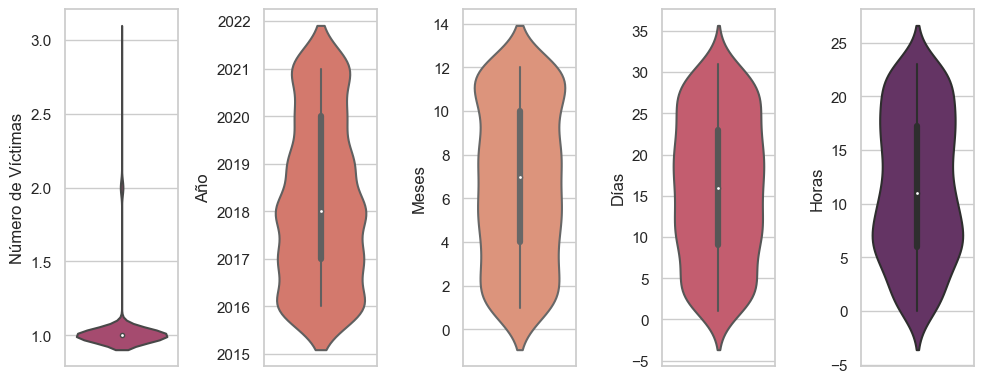

In [149]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 4))

# Crear subplots para los gráficos de violín
plt.subplot(1, 5, 1) 
sns.violinplot(data=df, y='N_VICTIMAS', color = "#b43c6c")
plt.ylabel('Número de Víctimas')

plt.subplot(1, 5, 2) 
sns.violinplot(data=df, y='AAAA', color = "#e46c5c")
plt.ylabel('Año')

plt.subplot(1, 5, 3) 
sns.violinplot(data=df, y='MM', color = "#ec8c6c")
plt.ylabel('Meses')

plt.subplot(1, 5, 4) 
sns.violinplot(data=df, y='DD', color = "#d44c64")
plt.ylabel('Días')

plt.subplot(1, 5, 5) 
sns.violinplot(data=df, y='HH', color = "#6c2c6c")
plt.ylabel('Horas')

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()


Cada uno de los gráficos que observamos arriba, nos muestran una distribución de las ocurrencias según la variable que estamos analizando. 

Para ninguno de los casos se encuentran outliers.

Si bien la primer gráfica podría sugerir un comportamiento extraño, esto se debe a que casi el 100% de los siniestros tienen una sola victima, concentrando casi todos los casos en la parte inferior del gráfico. Sin embargo, no consideramos como outliers valores que sean diferentes ya que el rango del gráfico se ajusta entre 1 y 3, valores coherentes para la cantidad de victimas de un siniestro vial. 

En conclusión, el data set no presenta valores anomalos que nos procupen para los análisis posteriores. 

<p>



</p>

## 6. Gráficos (variables cuantitativas)

### 6.1 Correlación de variables

Para identificar la relación entre las variables, crearemos una matriz de correlación. 

In [150]:
# Establecemos cuales son las variables que queremos analizar
variables_numericas = ['N_VICTIMAS', 'AAAA', 'MM', 'DD', 'HH', ]

# Creamos la matriz de correlación
correlation_matrix = df[variables_numericas].corr()

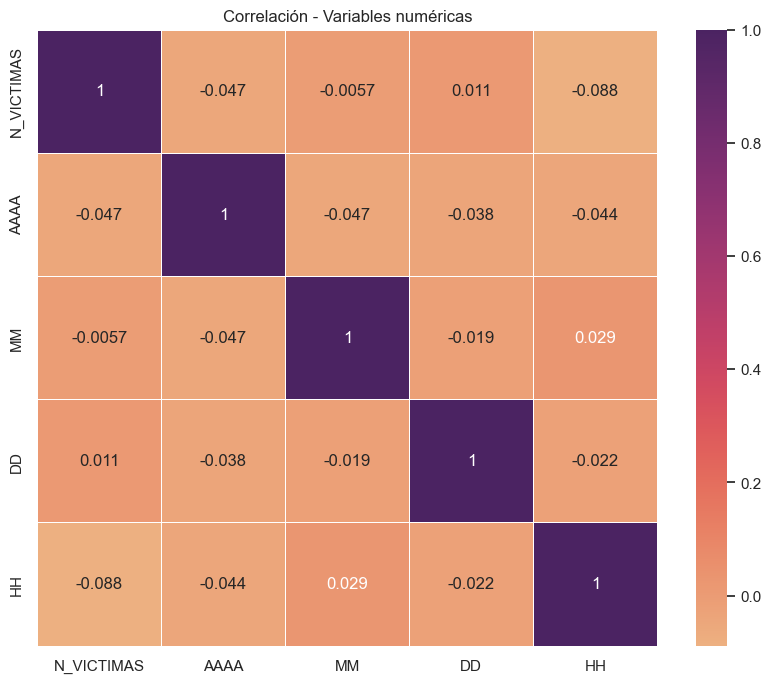

In [151]:
# Graficamos la matriz generada
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', linewidths=0.5)
plt.title('Correlación - Variables numéricas')
plt.show()

El análisis revela que la mayoría de los coeficientes de correlación se encuentran cercanos a cero, indicando una correlación débil o nula entre las variables.

Esto tiene sentido ya que, el año, mes, día y hora en la que ocurre el siniestro no esta ligada a la gravedad del incidente y a la cantidad de victimas resultantes.



<p>



</p>

### 6.2 Distribución de variables

Mediante la utlización de los siguientes gráficos y estadísticas, buscamos entender en profundidad la información de cada variable.

<p>



</p>

**N_VICTIMAS**

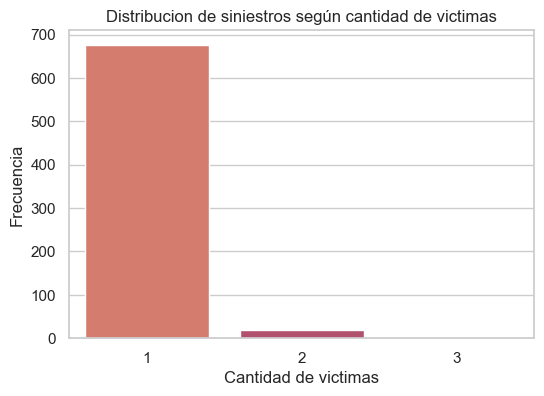

In [152]:
plt.figure(figsize=(6, 4))

sns.countplot(df, x='N_VICTIMAS', palette="flare")

plt.xlabel('Cantidad de victimas')
plt.ylabel('Frecuencia')
plt.title('Distribucion de siniestros según cantidad de victimas')

plt.show()



El gráfico nos revela que en su gran mayoría (casi el 100% de los casos), los siniestros resultan con una sola víctima fatal siendo notablemente menor la cantidad de hechos donde se presentan 2 o 3 homicidios.

<p>



</p>

**AAAA** (Año del siniestro)

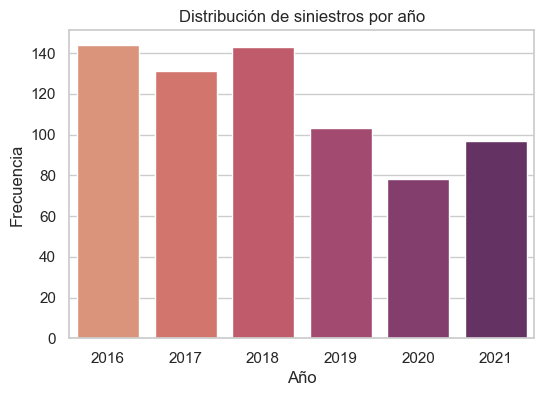

In [153]:
plt.figure(figsize=(6, 4)) 

sns.countplot(df, x='AAAA', palette="flare")

plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros por año')

plt.show()

El año con mayor cantidad de siniestros fue el 2016, con valores similares a los ocurridos en los años 2017 y 2018. 

Se observa una importante baja de siniestros en a partir del año 2019 siendo aún menor en el 2020.

En lineas generales, se observa una tendencia a la baja.

<p>



</p>

**MM** (Mes del siniestro)


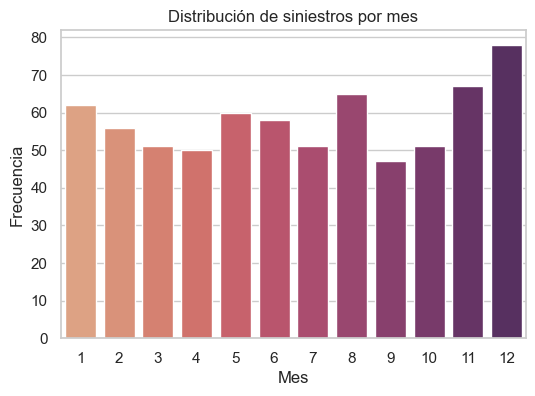

In [154]:
plt.figure(figsize=(6, 4)) 

sns.countplot(df, x='MM', palette="flare")

plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros por mes')

plt.show()

El mes con mayor cantidad de siniestros es diciembre. 

Los otros meses, si bien no estan tan alejados, parecen mantener un promedio de entre 50 y 60 siniestros por mes. 

En primera instancia, podríamos relacionar este comportamiento a las fiestas de fin de año donde aumenta notablemente el tráfico y la consgestión. 





<p>



</p>

**DD** (Día del siniestro)

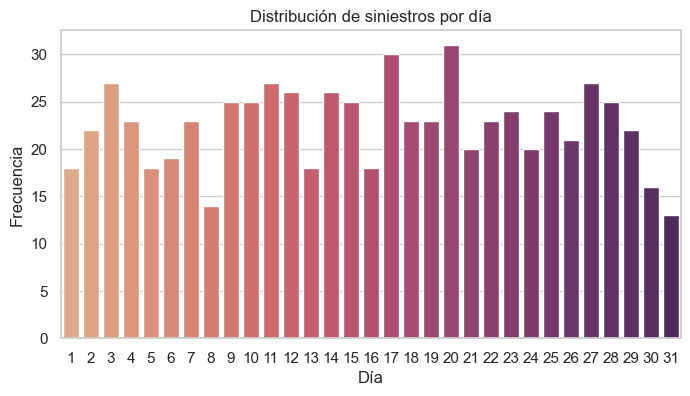

In [155]:
plt.figure(figsize=(8, 4))  # Ajustar el tamaño del gráfico si es necesario

sns.countplot(df, x='DD', palette="flare")

plt.xlabel('Día')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros por día')

plt.show()

<p>



</p>

**HH** (Hora del siniestro)

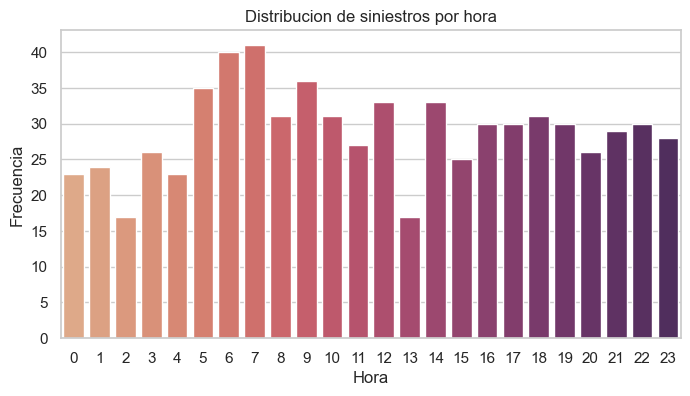

In [156]:
plt.figure(figsize=(8, 4))

sns.countplot(df, x='HH', palette="flare")

plt.xlabel('Hora')
plt.ylabel('Frecuencia')
plt.title('Distribucion de siniestros por hora')

plt.show()

Observamos en este gráfico que existe un pico de siniestros en las primeras horas de la mañana. 

Podemos relacionar este comportamiento con los horarios laborales y como esto condiciona al tráfico a y su congestión. 

Es evidente que entre las 6 y las 7 de la mañana es cuando más tráfico hay lo que genera un crecimiento en los siniestros viales, con un leve decrecimiento hacia la hora de la siesta, donde las personas suelen estar trabajando. 

Es importante aclarar que en la gran mayoria de CABA, los comercios hacen horario continuo, de 7-8 a 14-16 hs. 

Luego de las 13, comienza el crecimiento nuevamente, el cual podría a estar asociado a que las personas regresan del trabajo congestionando las calles. 

Durante la madrugada los valores llegan casi al mínimo y comienzan a crecer cuando nos acercamos al horario en el que las personas van al trabajo. 

Durante las horas de la noche, se observa estabilidad. 

<p>



</p>

## 7. Gráficos (variables cualitativas)